# Computer Vision
When we think about image analysis and manipulation we usually think about paid software like photoshop which does have an intuitive user interface and does allow for the manual manipulation of images. However, this procedure can be done in Python albeit with the loss of a user interphase. We will generally prefer this whenever we have a large amount of images we wish to analyze since doing the analysis by hand on every image will end up being very time consuming; thus, in applications of computer vision and image labeling a programming language is used to manipulate and analyze the image.

## How do computers see an image?
For us, looking at an image is relatively simple (due to our evolved eyesight and seemingly automatic analysis we do with our brain) yet once again we reach the point in which we must remember that computers and people speak different languages. We usually do the analysis in terms of the elements of art (line, shape, texture, brightness, form, space and color); however, computers aren't aware of said elements and their different values. As such; we need to find a way to translate these elements we use naturally into such a way that a computer is able to understand them, to do so we need to see how an image is stored.

We begin by loading the image Onion.jpg using matplotlib and inspecting the data type.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
#Counter allows to calculate frequencies efficiently and skimage helps for image optimization (not used yet in code). 
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

<class 'numpy.ndarray'>
(393, 590, 3)


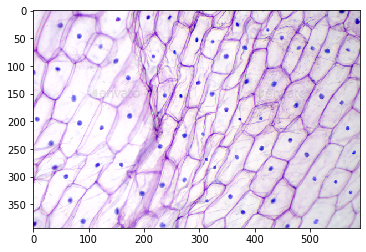

In [7]:
img = plt.imread('img/Onion.jpg',format=".jpg")
print(type(img))
plt.imshow(img)
plt.show()

So it's a numpy array; even though we know the object is an image the way it's stored is via a numpy nd array (the nd stands for n dimensions). Since now we know it's an array we can start to explore it and find out more about it; for example, two interesting properties of an array are its shape and number of dimensions since those 2 have a huge impact on the time the computer needs in order to parse through the image.

In [8]:
print(img.shape)

(393, 590, 3)


If we check the properties of the image using file explorer we see that the dimensions of the image is 393x590 pixels; this means that the first two values given by the np.shape method correspond to the size of the image. The last value corresponds to the channels of an image which has to do with the way we see and combine the visible color spectrum; this is what we call the RGB color scheme in which 3 images (a red one, a blue one and a green one) are combined in order to produce a final image.

![Array](img\3DDD.jpg)

### Image parsing (indexes)

Since the image is a numpy array; this means that all of the commands we have used with 1d arrays can be applicable to these (since we're dealing with the same type of object).

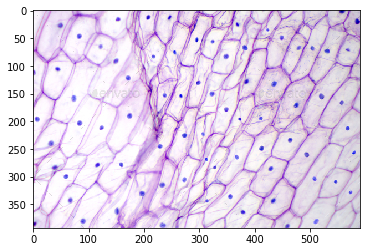

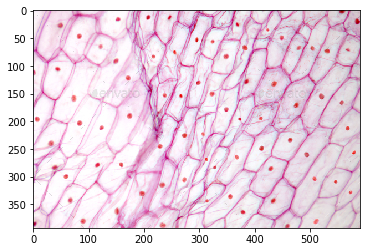

## Parsing an image
Computer Vision libraries usually have functions that allow them to parse through images quickly and efficiently. However; it's very useful to know how to do it manually using the basic functionalities of Python. In this case we can do so via the use of while, fors or list comprehensions (though python usually favours list comprehensions in regards to speed); this allows us to travel through each pixel of the image and apply a certain operation or change to it.

To make sure that we know the principles behind parsing we'll begin with some basic examples regarding the navigation and generation of lists. All that's required is background knowledge on control flow.

### Exercise!

1. Create a function that parses through an image (takes an RGB image as an input) and performs the following operation. Extract the red, green and blue channels into their own respective lists and plot all 4 images in the same figure (Red image, blue image, green image and normal image). 

2. Once that we have the numerical arrays; build a function that returns a histogram containing the frequency of the values of each channel.

    2.1 Load the image and split it into its 3 channels.
    
    2.2 You can either find a way to count the frequency of the values, or you can reshape the array such that a histogram can be done directly.
    
    2.3 Plot the resulting frequencies vs their corresponding values.
 
    2.4 Interpret the results, what can we learn about the image given this histogram?

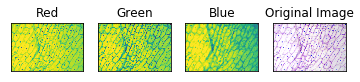

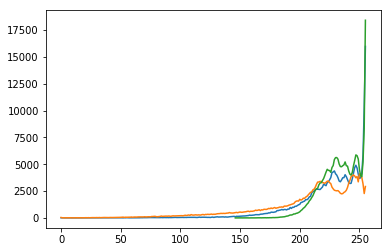

In [5]:

#Image Parser
def optimparse(img):
    f, ax=plt.subplots(1,4)
    T=["Red","Green","Blue","Original Image"]
    for i in range(0,4):
        if i<3:
            ax[i].imshow(img[:,:,i])
        else:
            ax[i].imshow(img)
        ax[i].title.set_text(T[i])
        ax[i].set_xticks([]), ax[i].set_yticks([]),
    
    plt.show()
optimparse(img_rgb)
#Color histogram
def colhist(img):
    #Decompose the image into channels
    chans = cv2.split(img)
    #Generate our bins
    bins = np.linspace(0, 255, 150)
    #Find the count of unique values and plot the lines over each other.
    x,y = np.unique(chans[0], return_counts=True)
    plt.plot(x,y)
    x,y = np.unique(chans[1], return_counts=True)
    plt.plot(x,y)
    x,y = np.unique(chans[2], return_counts=True)
    plt.plot(x,y)
    plt.show()
colhist(img_rgb)

So how do we interpret a color histogram? We do see that the image is dominated by high cell values given the peaks located on the far right but what does that represent? It refers to the "lightness" and "darkness" of an image; a concentration of the values on the right will represent an image that is predominantly white (lighter) while the left side corresponds to darker features. As such; if we wanted to filter out light or dark features a color histogram would be a good way to approximate our given threshold.

## Problem 3
3.1 We have a folder named Bact which contains the images depicting the growth of an E. Coli colony of bacteria. Without creating a new file or moving the current notebook; find a way to generate a list that contains the name of every image in the Bact folder. Hint: You can peek into the folder and read the names. (Solutions where you create a list by typing every name by hand wont be accepted).

3.2 Load 5 of the given images onto Python; explore its structure and obtain the color histogram. Remember that Python loads images in the BGR format so you might have to do a conversion in order to simplify things.

3.3 Find a way to quantify the growth of bacteria across the images. (Every image is taken at a set time interval (10 minutes)).

3.4 Graph the size of the colony as a function of time using the matplotlib package.

In [6]:
# Generate a code that stores the name of the files in a list. There are 36 images.
filename_list = [] 

for i in range(37):
    if i < 10:
        # If the number is < 10 then we should put a 0 at the beginning.
        filename_list.append('colony_growth_' + '0' + str(i) + '.tif')        
    else:
        # Otherwise, we don't need the 0.
        filename_list.append('colony_growth_' + str(i) + '.tif')
print(filename_list)

['colony_growth_00.tif', 'colony_growth_01.tif', 'colony_growth_02.tif', 'colony_growth_03.tif', 'colony_growth_04.tif', 'colony_growth_05.tif', 'colony_growth_06.tif', 'colony_growth_07.tif', 'colony_growth_08.tif', 'colony_growth_09.tif', 'colony_growth_10.tif', 'colony_growth_11.tif', 'colony_growth_12.tif', 'colony_growth_13.tif', 'colony_growth_14.tif', 'colony_growth_15.tif', 'colony_growth_16.tif', 'colony_growth_17.tif', 'colony_growth_18.tif', 'colony_growth_19.tif', 'colony_growth_20.tif', 'colony_growth_21.tif', 'colony_growth_22.tif', 'colony_growth_23.tif', 'colony_growth_24.tif', 'colony_growth_25.tif', 'colony_growth_26.tif', 'colony_growth_27.tif', 'colony_growth_28.tif', 'colony_growth_29.tif', 'colony_growth_30.tif', 'colony_growth_31.tif', 'colony_growth_32.tif', 'colony_growth_33.tif', 'colony_growth_34.tif', 'colony_growth_35.tif', 'colony_growth_36.tif']


In [7]:
# Alternatively, we can just ask for all the filenames in appropriate directory "Bact/"
# This way we don't need to know how many images there are.
import os

filename_list = os.listdir('Bact/')
print(filename_list)

['colony_growth_00.tif', 'colony_growth_01.tif', 'colony_growth_02.tif', 'colony_growth_03.tif', 'colony_growth_04.tif', 'colony_growth_05.tif', 'colony_growth_06.tif', 'colony_growth_07.tif', 'colony_growth_08.tif', 'colony_growth_09.tif', 'colony_growth_10.tif', 'colony_growth_11.tif', 'colony_growth_12.tif', 'colony_growth_13.tif', 'colony_growth_14.tif', 'colony_growth_15.tif', 'colony_growth_16.tif', 'colony_growth_17.tif', 'colony_growth_18.tif', 'colony_growth_19.tif', 'colony_growth_20.tif', 'colony_growth_21.tif', 'colony_growth_22.tif', 'colony_growth_23.tif', 'colony_growth_24.tif', 'colony_growth_25.tif', 'colony_growth_26.tif', 'colony_growth_27.tif', 'colony_growth_28.tif', 'colony_growth_29.tif', 'colony_growth_30.tif', 'colony_growth_31.tif', 'colony_growth_32.tif', 'colony_growth_33.tif', 'colony_growth_34.tif', 'colony_growth_35.tif', 'colony_growth_36.tif']


By viewing the images we notice that as time progresses the amount of bacteria tends to increase; this will be reflected in the image as a increase in brightness overall since the background is dark. Therefore; if we want to filter the bacteria we need to calculate a threshold after which the overall darkness is gone. This can be accomplished via a color histogram.

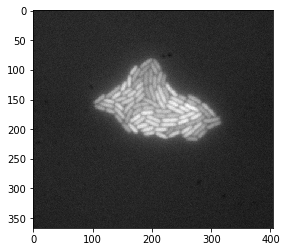

In [8]:
# Let's look at a picture of bacteria!
# First we read the image.
imu = cv2.imread("Bact/" + filename_list[-1])

# Then we show it!
plt.imshow(imu)
plt.show()

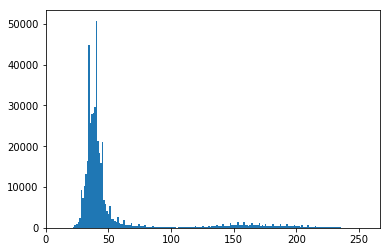

The first peak corresponds to a dark background, so we need to filter out after that one. 100 seems good.


In [9]:
# Now we plot a histogram of the values. We need to convert the 2D image into a 1D array for this
# since the hist() function doesn't know how deal with a 2d array. 
img_1d = imu.flatten()

# We can just plot a histogram to see which values are common. There are 255 distinct values, so 
# setting bins to 200 means there is about 1 value per bin. 
plt.hist(img_1d, bins=200)

# Looks like the background is less than 50, so if we set a threshold at 100 we will ignore the background.
plt.show()
print("The first peak corresponds to a dark background, so we need to filter out after that one. 100 seems good.")

In [10]:
# We can quantify the growth by looking at the number of bright pixels.
# Initially all the values are 0, but we will change then in a loop below
bright_pixels = np.zeros(len(filename_list))

# Enumerate gives us both the index and the value in our list of filenames. Cool, right!
for i, filename in enumerate(filename_list):
    imu = cv2.imread('Bact/' + filename)
    filtered = imu > 100
    
    # we use the np.sum() function to count the number of pixels that have values above 100.
    bright_pixels[i] = np.sum(filtered)
print(bright_pixels)

[ 3594.  2541.  2598.  2301.  2661.  4269.  3876.  5238.  3996.  3804.
  4137.  4434.  4722.  5352.  5997.  6177.  6738.  7146.  7968.  8613.
  9441. 10356. 11451. 12714. 14136. 16224. 17802. 19581. 21771. 24279.
 26814. 29634. 32799. 35763. 39171. 43758. 48045.]


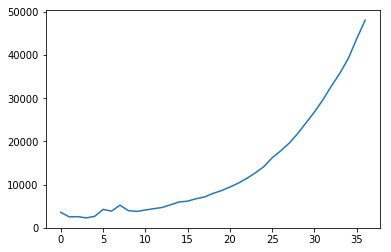

In [11]:
# Now the easy part, plotting the result.
plt.plot(bright_pixels)
plt.show()

This previous example is useful since it shows us how easily we can filter an image via the use of a channel; however, in this example we only used an image with one channel which made the filtering process easy. This is not always the case since we can see images 

# Introduction to Machine Learning
Machine learning is a field that studies algorithms and statistics to make a computer perform a task without giving it specific instructions. Rather, it learns a set of rules from patterns and inference that allows the computer to make decisions; the field (as it's the case with any other) 

In [15]:
my_list=['Sam','Mary','Joseph','Happy','Sad','banana']
new=np.reshape(my_list,(2,3))
print(new)
with open('new1.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(my_list)
csvFile.close()

[['Sam' 'Mary' 'Joseph']
 ['Happy' 'Sad' 'banana']]
